In [252]:
library(dplyr)

## Manhattan Data FY 2011/2012

In [253]:
borough <- read.csv(file="DOF__Condominium_Comparable_Rental_Income___Manhattan___FY_2011_2012.csv",header=TRUE,sep=",");
cat('Dataset:')
head(borough)

Dataset:

,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Boro.Block.Lot,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Condo.Section,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Address,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Neighborhood,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Building.Classification,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Total.Units,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Year.Built,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Gross.SqFt,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Estimated.Gross.Income,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Gross.Income.per.SqFt,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Estimated.Expense,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Expense.per.SqFt,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Net.Operating.Income,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Full.Market.Value,MANHATTAN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...1.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...1.â...Address,COMPARABLE.RENTAL.â...1.â...Neighborhood,COMPARABLE.RENTAL.â...1.â...Building.Classification,COMPARABLE.RENTAL.â...1.â...Total.Units,COMPARABLE.RENTAL.â...1.â...Year.Built,COMPARABLE.RENTAL.â...1.â...Gross.SqFt,COMPARABLE.RENTAL.â...1.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...1.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...1.â...Estimated.Expense,COMPARABLE.RENTAL.â...1.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...1.â...Net.Operating.Income,COMPARABLE.RENTAL.â...1.â...Full.Market.Value,COMPARABLE.RENTAL.â...1.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...1.â...Distance.from.Condo.in.miles,COMPARABLE.RENTAL.â...2.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...2.â...Address,COMPARABLE.RENTAL.â...2.â...Neighborhood,COMPARABLE.RENTAL.â...2.â...Building.Classification,COMPARABLE.RENTAL.â...2.â...Total.Units,COMPARABLE.RENTAL.â...2.â...Year.Built,COMPARABLE.RENTAL.â...2.â...Gross.SqFt,COMPARABLE.RENTAL.â...2.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...2.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...2.â...Estimated.Expense,COMPARABLE.RENTAL.â...2.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...2.â...Net.Operating.Income,COMPARABLE.RENTAL.â...2.â...Full.Market.Value,COMPARABLE.RENTAL.â...2.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...2.â...Distance.from.Condo.in.miles,COMPARABLE.RENTAL.â...3.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...3.â...Address,COMPARABLE.RENTAL.â...3.â...Neighborhood,COMPARABLE.RENTAL.â...3.â...Building.Classification,COMPARABLE.RENTAL.â...3.â...Total.Units,COMPARABLE.RENTAL.â...3.â...Year.Built,COMPARABLE.RENTAL.â...3.â...Gross.SqFt,COMPARABLE.RENTAL.â...3.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...3.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...3.â...Estimated.Expense,COMPARABLE.RENTAL.â...3.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...3.â...Net.Operating.Income,COMPARABLE.RENTAL.â...3.â...Full.Market.Value,COMPARABLE.RENTAL.â...3.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...3.â...Distance.from.Condo.in.miles
1,1-00007-7501,0735-R1,1 COENTIES SLIP,FINANCIAL,R9-CONDOMINIUM,42,1920,36500,1332615,36.51,342005,9.37,990610,7300000,200,1-00065-0010,9 MAIDEN LANE,FINANCIAL,D5-ELEVATOR,68,1900,58354,2099485,35.98,645225,11.06,1454260,10730000,183.88,0.45,1-00107-0042,23 PECK SLIP,SOUTHBRIDGE,D7-ELEVATOR,24,1900,25903,959447,37.04,326119,12.59,633328,2948000,113.81,0.61,,,,,NA,NA,,,NA,,NA,,,NA,NA
2,1-00008-7501,1822-R1,39 WHITEHALL STREET,FINANCIAL,R4-CONDOMINIUM,78,1985,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,1-00602-0010,600 WASHINGTON STREET,GREENWICH VILLAGE-WEST,D6-ELEVATOR,137,2003,109060,5925984,54.34,1642405,15.06,4283579,31972000,293.16,1.94,1-00016-0180,20 RIVER TERRACE,TRIBECA,D8-ELEVATOR,294,2002,356786,18051324,50.59,4569252,12.81,13482072,100974000,283.01,0.6,,,,,NA,NA,,,NA,,NA,,,NA,NA
3,1-00015-7501,1025-R1,17 BATTERY PLACE,FINANCIAL,RR-CONDOMINIUM,500,NA,554174,17310000

Выгода сдачи в аренду для каждого из типов жилья в этом районе:

,building_class,mean_benefit
1,D2-ELEVATOR,0.9260538
2,D8-ELEVATOR,0.7184848
3,D6-ELEVATOR,0.716655
4,D5-ELEVATOR,0.7116277
5,D7-ELEVATOR,0.7038947
6,D1-ELEVATOR,0.6998538
7,R4-CONDOMINIUM,0.692515
8,RR-CONDOMINIUM,0.6765416
9,R9-CONDOMINIUM,0.6705953
10,D9-ELEVATOR,0.6698887


Гистограмма выгоды сдачи жилья в этом районе по каждой сделке:

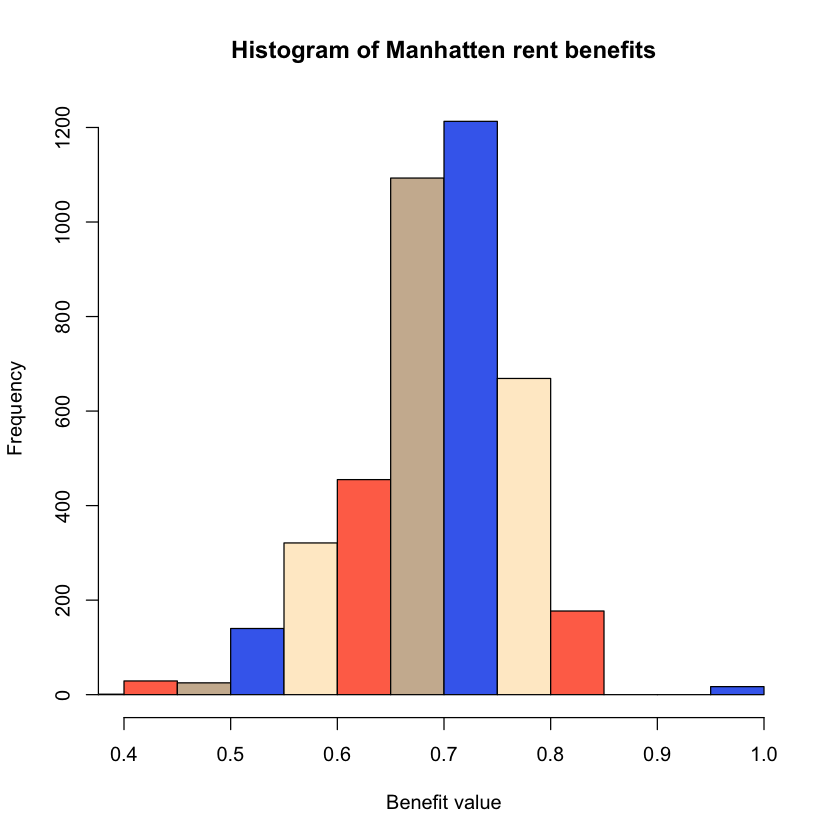

In [254]:
borough1 <- select(borough, contains("Income"))

colnames(borough1)[1] <- "col_buy_costs"
colnames(borough1)[3] <- "col_rent_costs"
colnames(borough1)[4] <- "a_col_buy_costs"
colnames(borough1)[6] <- "a_col_rent_costs"
colnames(borough1)[7] <- "b_col_buy_costs"
colnames(borough1)[9] <- "b_col_rent_costs"

borough10 <- select(borough1, col_buy_costs, col_rent_costs)
borough11 <- select(borough1, a_col_buy_costs, a_col_rent_costs)
borough12 <- select(borough1, b_col_buy_costs, b_col_rent_costs)

colnames(borough11)[1] <- "col_buy_costs"
colnames(borough11)[2] <- "col_rent_costs"
colnames(borough12)[1] <- "col_buy_costs"
colnames(borough12)[2] <- "col_rent_costs"

prices <- rbind(borough10, borough11, borough12, deparse.level = 1)
prices <- mutate(prices, benefit = col_rent_costs / col_buy_costs)

borough2 <- select(borough, contains("Classification"))

borough10 <- select(borough2, contains("PROPERTIES.â...Building.Classification"))
borough11 <- select(borough2, contains("1.â...Building.Classification"))
borough12 <- select(borough2, contains("2.â...Building.Classification"))

colnames(borough10)[1] <- "building_class"
colnames(borough11)[1] <- "building_class"
colnames(borough12)[1] <- "building_class"

classes <- rbind(borough10, borough11, borough12, deparse.level = 1)

prices_and_classes <- cbind(prices, classes)

popular_deals <- classes %>% 
    group_by(building_class) %>%
    summarise(total = n()) %>% arrange(-total) %>% filter(total > 2)

max_benefits <- prices_and_classes %>% 
    group_by(building_class) %>%
    summarise(total = n()) %>% arrange(-total)

cat('Выгода сдачи в аренду для каждого из типов жилья в этом районе:')
mrbbt <- prices_and_classes %>% select(benefit, building_class) %>%
group_by(building_class) %>% summarise(mean_benefit = mean(benefit)) %>% arrange(-mean_benefit) %>% filter(mean_benefit > 0.1)
mrbbt

cat('Гистограмма выгоды сдачи жилья в этом районе по каждой сделке:')
hist(prices$benefit, xlim = range(0.4,1), main="Histogram of Manhatten rent benefits", xlab="Benefit value", col = c("royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","blanchedalmond","royalblue2"))

In [255]:
manhattan <- summarise(prices, benefit = mean(col_rent_costs, na.rm = TRUE) / mean(col_buy_costs, na.rm = TRUE))
cat('Выгода сдачи в аренду жилья в этом районе:')
manhattan$benefit

cat('Сделки в этом районе по их популярности:')
popular_deals

Выгода сдачи в аренду жилья в этом районе:

[1] 0.7102933

Сделки в этом районе по их популярности:

,building_class,total
1,R4-CONDOMINIUM,1063
2,D9-ELEVATOR,633
3,D6-ELEVATOR,628
4,D7-ELEVATOR,395
5,D1-ELEVATOR,337
6,D8-ELEVATOR,183
7,R9-CONDOMINIUM,176
8,D3-ELEVATOR,172
9,C7-WALK-UP,153
10,D5-ELEVATOR,140


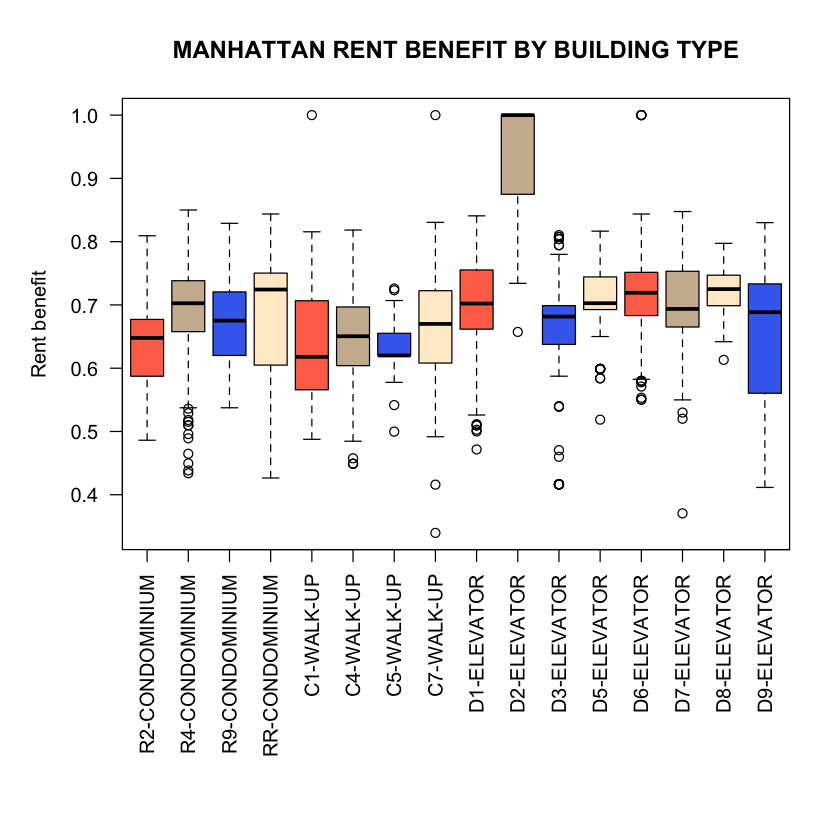

In [256]:
borough3 <- select(prices, contains("benefit"))
for_boxplot = cbind(borough3, classes, deparse.level = 1)
boxplot(benefit~building_class, data=for_boxplot, las = 2, par(mar = c(12, 5, 4, 2)+ 0.1), main=toupper("Manhattan rent benefit by building type"), ylab="Rent benefit", col = c("coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","blanchedalmond","royalblue2"), xlim = range(1,16))

## Brooklyn Data FY 2011/2012

In [257]:
borough <- read.csv(file="DOF__Condominium_Comparable_Rental_Income___Brooklyn___FY_2011_2012.csv",header=TRUE,sep=",");
cat('Dataset:')
head(borough)

Dataset:

,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Boro.Block.Lot,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Condo.Section,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Address,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Neighborhood,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Building.Classification,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Total.Units,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Year.Built,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Gross.SqFt,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Estimated.Gross.Income,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Gross.Income.per.SqFt,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Estimated.Expense,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Expense.per.SqFt,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Net.Operating.Income,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Full.Market.Value,BROOKLYN.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...1.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...1.â...Address,COMPARABLE.RENTAL.â...1.â...Neighborhood,COMPARABLE.RENTAL.â...1.â...Building.Classification,COMPARABLE.RENTAL.â...1.â...Total.Units,COMPARABLE.RENTAL.â...1.â...Year.Built,COMPARABLE.RENTAL.â...1.â...Gross.SqFt,COMPARABLE.RENTAL.â...1.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...1.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...1.â...Estimated.Expense,COMPARABLE.RENTAL.â...1.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...1.â...Net.Operating.Income,COMPARABLE.RENTAL.â...1.â...Full.Market.Value,COMPARABLE.RENTAL.â...1.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...1.â...Distance.from.Condo.in.miles,COMPARABLE.RENTAL.â...2.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...2.â...Address,COMPARABLE.RENTAL.â...2.â...Neighborhood,COMPARABLE.RENTAL.â...2.â...Building.Classification,COMPARABLE.RENTAL.â...2.â...Total.Units,COMPARABLE.RENTAL.â...2.â...Year.Built,COMPARABLE.RENTAL.â...2.â...Gross.SqFt,COMPARABLE.RENTAL.â...2.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...2.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...2.â...Estimated.Expense,COMPARABLE.RENTAL.â...2.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...2.â...Net.Operating.Income,COMPARABLE.RENTAL.â...2.â...Full.Market.Value,COMPARABLE.RENTAL.â...2.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...2.â...Distance.from.Condo.in.miles,COMPARABLE.RENTAL.â...3.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...3.â...Address,COMPARABLE.RENTAL.â...3.â...Neighborhood,COMPARABLE.RENTAL.â...3.â...Building.Classification,COMPARABLE.RENTAL.â...3.â...Total.Units,COMPARABLE.RENTAL.â...3.â...Year.Built,COMPARABLE.RENTAL.â...3.â...Gross.SqFt,COMPARABLE.RENTAL.â...3.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...3.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...3.â...Estimated.Expense,COMPARABLE.RENTAL.â...3.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...3.â...Net.Operating.Income,COMPARABLE.RENTAL.â...3.â...Full.Market.Value,COMPARABLE.RENTAL.â...3.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...3.â...Distance.from.Condo.in.miles
1,3-00027-7501,0658-R1,1 MAIN STREET,DOWNTOWN-FULTON FERRY,R4-CONDOMINIUM,124,1913,227916,5150902,22.6,1802816,7.91,3348086,23759904,104.25,3-00221-0020,80 CRANBERRY STREET,BROOKLYN HEIGHTS,D6-ELEVATOR,137,1900,108780,2458853,22.6,985722,9.06,1473131,10766000,98.97,0.33,3-00056-0003,99 GOLD STREET,DOWNTOWN-FULTON FERRY,D5-ELEVATOR,88,1919,109875,3305618,30.09,1533558,13.96,1772060,13272000,120.79,0.45,3-00220-0016,35 ORANGE STREET,BROOKLYN HEIGHTS,D1-ELEVATOR,48,1924,"47,136","744,258",15.79,"392,493",8.33,"351,765","2,405,000",51.02,0.35
2,3-00028-7501,1370-R1,31 WASHINGTON STREET,DOWNTOWN-FULTON FERRY,R4-CONDOMINIUM,13,2001,24672,543031,22.01,222643,9.02,320388,2346000,95.09,3-00268-0039,54 LIVINGSTON STREET,BROOKLYN HEIGHTS,D9-ELEVATOR,32,1900,21040,409047,19.44,195029,9.27,214018,1529000,72.67,0.84,3-00263-0044,18 SIDNEY PLACE,BROOKLYN HEIGHTS,D9-ELEVATOR,18,1900,9875,309659,31.36,112744,11.42,196915,

Выгода сдачи в аренду для каждого из типов жилья в этом районе:

,building_class,mean_benefit
1,D8-ELEVATOR,0.6794855
2,D6-ELEVATOR,0.623744
3,D1-ELEVATOR,0.5839223
4,D7-ELEVATOR,0.5798474
5,C7-WALK-UP,0.5745174
6,C4-WALK-UP,0.5739195
7,R4-CONDOMINIUM,0.5728633
8,C9-WALK-UP,0.5612533
9,D2-ELEVATOR,0.5586729
10,R2-CONDOMINIUM,0.5577711


Гистограмма выгоды сдачи жилья в этом районе по каждой сделке:

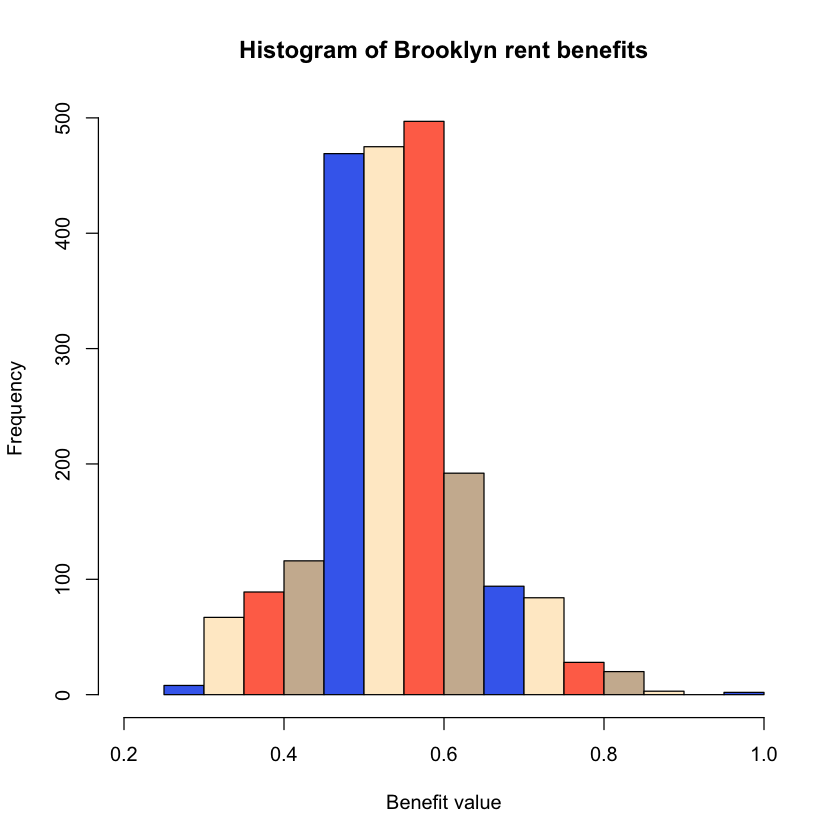

In [258]:
borough1 <- select(borough, contains("Income"))

colnames(borough1)[1] <- "col_buy_costs"
colnames(borough1)[3] <- "col_rent_costs"
colnames(borough1)[4] <- "a_col_buy_costs"
colnames(borough1)[6] <- "a_col_rent_costs"
colnames(borough1)[7] <- "b_col_buy_costs"
colnames(borough1)[9] <- "b_col_rent_costs"

borough10 <- select(borough1, col_buy_costs, col_rent_costs)
borough11 <- select(borough1, a_col_buy_costs, a_col_rent_costs)
borough12 <- select(borough1, b_col_buy_costs, b_col_rent_costs)

colnames(borough11)[1] <- "col_buy_costs"
colnames(borough11)[2] <- "col_rent_costs"
colnames(borough12)[1] <- "col_buy_costs"
colnames(borough12)[2] <- "col_rent_costs"

prices <- rbind(borough10, borough11, borough12, deparse.level = 1)
prices <- mutate(prices, benefit = col_rent_costs / col_buy_costs)

borough2 <- select(borough, contains("Classification"))

borough10 <- select(borough2, contains("PROPERTIES.â...Building.Classification"))
borough11 <- select(borough2, contains("1.â...Building.Classification"))
borough12 <- select(borough2, contains("2.â...Building.Classification"))

colnames(borough10)[1] <- "building_class"
colnames(borough11)[1] <- "building_class"
colnames(borough12)[1] <- "building_class"

classes <- rbind(borough10, borough11, borough12, deparse.level = 1)

prices_and_classes <- cbind(prices, classes)

popular_deals <- classes %>% 
    group_by(building_class) %>%
    summarise(total = n()) %>% arrange(-total) %>% filter(total != 7)

max_benefits <- prices_and_classes %>% 
    group_by(building_class) %>%
    summarise(total = n()) %>% arrange(-total)

cat('Выгода сдачи в аренду для каждого из типов жилья в этом районе:')
mrbbt <- prices_and_classes %>% select(benefit, building_class) %>%
group_by(building_class) %>% summarise(mean_benefit = mean(benefit)) %>% arrange(-mean_benefit) %>% filter(mean_benefit > 0.1)
mrbbt

cat('Гистограмма выгоды сдачи жилья в этом районе по каждой сделке:')
hist(prices$benefit, xlim = range(0.2,1), main="Histogram of Brooklyn rent benefits", xlab="Benefit value", col = c("royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","blanchedalmond","royalblue2"))

In [259]:
brooklyn <- summarise(prices, benefit = mean(col_rent_costs, na.rm = TRUE) / mean(col_buy_costs, na.rm = TRUE))
cat('Выгода сдачи в аренду жилья в этом районе:')
brooklyn$benefit

cat('Сделки в этом районе по их популярности:')
popular_deals

Выгода сдачи в аренду жилья в этом районе:

[1] 0.545498

Сделки в этом районе по их популярности:

,building_class,total
1,D9-ELEVATOR,663
2,R4-CONDOMINIUM,466
3,C1-WALK-UP,400
4,R2-CONDOMINIUM,225
5,D1-ELEVATOR,224
6,C7-WALK-UP,41
7,D3-ELEVATOR,30
8,R9-CONDOMINIUM,24
9,D7-ELEVATOR,21
10,D5-ELEVATOR,20


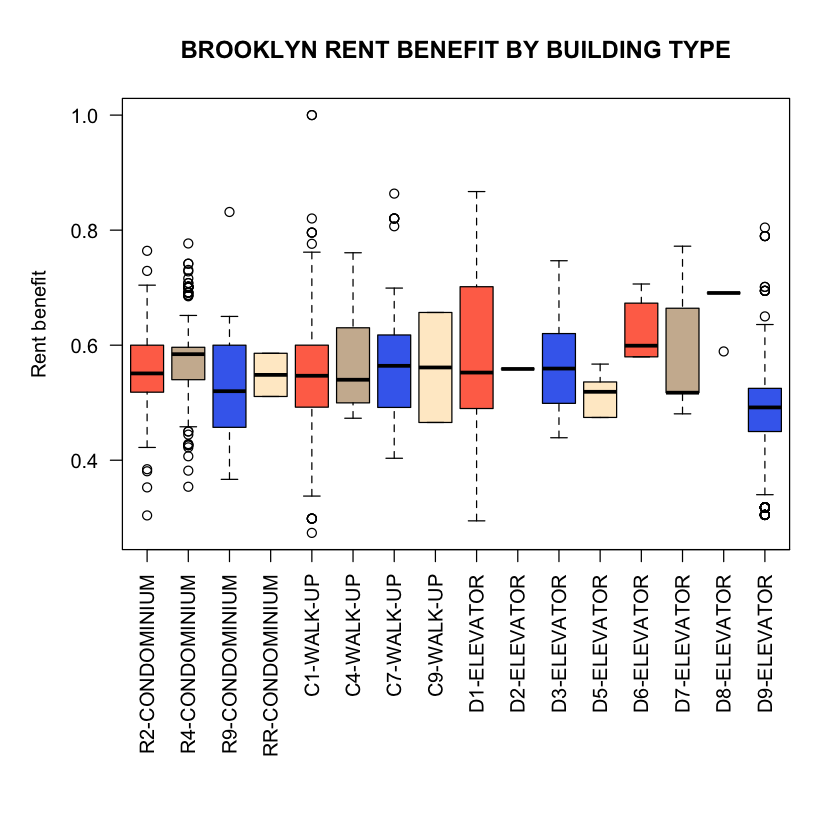

In [260]:
borough3 <- select(prices, contains("benefit"))
for_boxplot = cbind(borough3, classes, deparse.level = 1)
boxplot(benefit~building_class, data=for_boxplot, las = 2, par(mar = c(12, 5, 4, 2)+ 0.1), main=toupper("Brooklyn rent benefit by building type"), ylab="Rent benefit", col = c("coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","blanchedalmond","royalblue2"), xlim = range(1,16))

## Queens Data FY 2011/2012

In [261]:
borough <- read.csv(file="DOF__Condominium_Comparable_Rental_Income___Queens___FY_2011_2012.csv",header=TRUE,sep=",");
cat('Dataset:')
head(borough)

Dataset:

,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Boro.Block.Lot,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Condo.Section,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Address,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Neighborhood,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Building.Classification,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Total.Units,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Year.Built,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Gross.SqFt,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Estimated.Gross.Income,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Gross.Income.per.SqFt,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Estimated.Expense,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Expense.per.SqFt,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Net.Operating.Income,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Full.Market.Value,QUEENS.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...1.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...1.â...Address,COMPARABLE.RENTAL.â...1.â...Neighborhood,COMPARABLE.RENTAL.â...1.â...Building.Classification,COMPARABLE.RENTAL.â...1.â...Total.Units,COMPARABLE.RENTAL.â...1.â...Year.Built,COMPARABLE.RENTAL.â...1.â...Gross.SqFt,COMPARABLE.RENTAL.â...1.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...1.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...1.â...Estimated.Expense,COMPARABLE.RENTAL.â...1.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...1.â...Net.Operating.Income,COMPARABLE.RENTAL.â...1.â...Full.Market.Value,COMPARABLE.RENTAL.â...1.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...1.â...Distance.from.Condo.in.miles,COMPARABLE.RENTAL.â...2.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...2.â...Address,COMPARABLE.RENTAL.â...2.â...Neighborhood,COMPARABLE.RENTAL.â...2.â...Building.Classification,COMPARABLE.RENTAL.â...2.â...Total.Units,COMPARABLE.RENTAL.â...2.â...Year.Built,COMPARABLE.RENTAL.â...2.â...Gross.SqFt,COMPARABLE.RENTAL.â...2.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...2.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...2.â...Estimated.Expense,COMPARABLE.RENTAL.â...2.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...2.â...Net.Operating.Income,COMPARABLE.RENTAL.â...2.â...Full.Market.Value,COMPARABLE.RENTAL.â...2.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...2.â...Distance.from.Condo.in.miles,COMPARABLE.RENTAL.â...3.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...3.â...Address,COMPARABLE.RENTAL.â...3.â...Neighborhood,COMPARABLE.RENTAL.â...3.â...Building.Classification,COMPARABLE.RENTAL.â...3.â...Total.Units,COMPARABLE.RENTAL.â...3.â...Year.Built,COMPARABLE.RENTAL.â...3.â...Gross.SqFt,COMPARABLE.RENTAL.â...3.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...3.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...3.â...Estimated.Expense,COMPARABLE.RENTAL.â...3.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...3.â...Net.Operating.Income,COMPARABLE.RENTAL.â...3.â...Full.Market.Value,COMPARABLE.RENTAL.â...3.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...3.â...Distance.from.Condo.in.miles
1,4-00015-7501,0608-R1,2 51 AVENUE,LONG ISLAND CITY,R4-CONDOMINIUM,57,2007,53685,1368968,25.5,416059,7.75,952909,6180002,115.12,4-00021-0060,47 CENTER BOULEVARD,LONG ISLAND CITY,D8-ELEVATOR,395,2007,466000,14588166,31.31,5463240,11.72,9124926,37800000,81.12,0.24,,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,,NA,NA,,,NA,,NA,,,NA,NA
2,4-00016-7501,0597-R1,50 2 STREET,LONG ISLAND CITY,R4-CONDOMINIUM,177,1909,187845,3381210,18,1292374,6.88,2088836,13433994,71.52,4-00414-0041,41 CRESCENT STREET,LONG ISLAND CITY,D1-ELEVATOR,141,2007,80000,3422550,42.78,1343416,16.79,2079134,15682000,196.03,1.1,4-00021-0060,47 CENTER BOULEVARD,LONG ISLAND CITY,D8-ELEVATOR,395,2007,466000,14588166,31.31,5463240,11.72,9124926,37800000,81.12,0.2,,,,,NA,NA,,,NA,,NA,,,NA,NA
3,4-00021-7501,0639-R1,46 CENTER BOULEVARD,LONG ISLAND CITY,R4-CONDOMINIUM,184,2008,249920,6185520,24.75,1936880,7.75,4248640,30992004,124.01,4-00414-0041,41 CRESCENT STREET,LONG ISLAND CITY,D1-ELEV

Выгода сдачи в аренду для каждого из типов жилья в этом районе:

,building_class,mean_benefit
1,C4-WALK-UP,0.781848
2,D3-ELEVATOR,0.6672747
3,RR-CONDOMINIUM,0.6606719
4,D8-ELEVATOR,0.6510268
5,D5-ELEVATOR,0.6495233
6,C7-WALK-UP,0.632635
7,D9-ELEVATOR,0.6287705
8,D7-ELEVATOR,0.6207587
9,D1-ELEVATOR,0.6135741
10,D6-ELEVATOR,0.6106343


Гистограмма выгоды сдачи жилья в этом районе по каждой сделке:

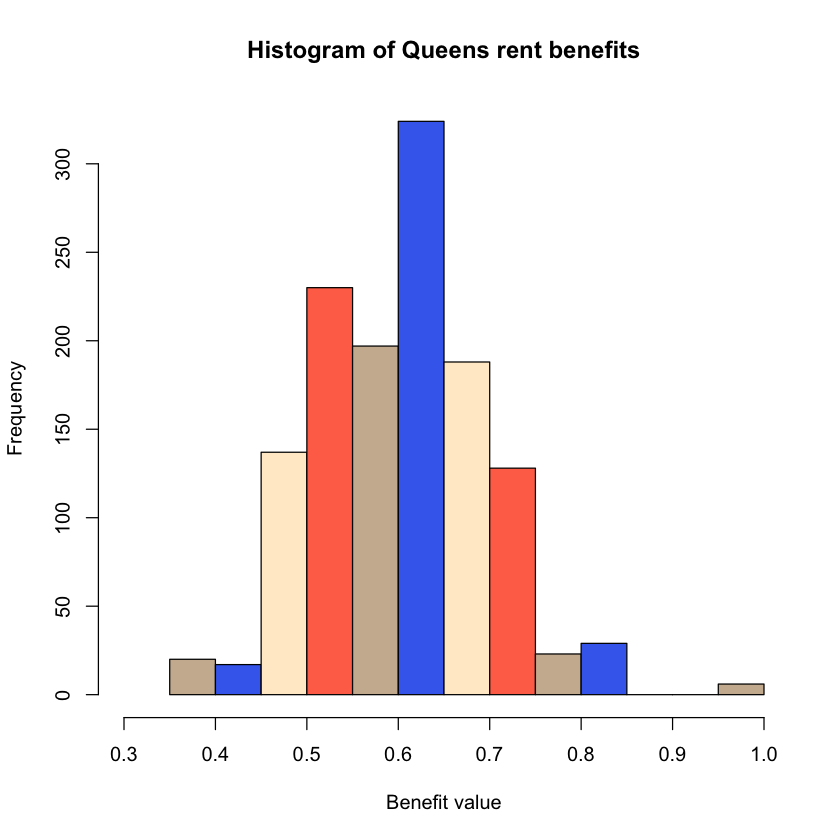

In [262]:
borough1 <- select(borough, contains("Income"))

colnames(borough1)[1] <- "col_buy_costs"
colnames(borough1)[3] <- "col_rent_costs"
colnames(borough1)[4] <- "a_col_buy_costs"
colnames(borough1)[6] <- "a_col_rent_costs"
colnames(borough1)[7] <- "b_col_buy_costs"
colnames(borough1)[9] <- "b_col_rent_costs"

borough10 <- select(borough1, col_buy_costs, col_rent_costs)
borough11 <- select(borough1, a_col_buy_costs, a_col_rent_costs)
borough12 <- select(borough1, b_col_buy_costs, b_col_rent_costs)

colnames(borough11)[1] <- "col_buy_costs"
colnames(borough11)[2] <- "col_rent_costs"
colnames(borough12)[1] <- "col_buy_costs"
colnames(borough12)[2] <- "col_rent_costs"

prices <- rbind(borough10, borough11, borough12, deparse.level = 1)
prices <- mutate(prices, benefit = col_rent_costs / col_buy_costs)

borough2 <- select(borough, contains("Classification"))

borough10 <- select(borough2, contains("PROPERTIES.â...Building.Classification"))
borough11 <- select(borough2, contains("1.â...Building.Classification"))
borough12 <- select(borough2, contains("2.â...Building.Classification"))

colnames(borough10)[1] <- "building_class"
colnames(borough11)[1] <- "building_class"
colnames(borough12)[1] <- "building_class"

classes <- rbind(borough10, borough11, borough12, deparse.level = 1)

prices_and_classes <- cbind(prices, classes)

popular_deals <- classes %>% 
    group_by(building_class) %>%
    summarise(total = n()) %>% arrange(-total) %>% filter(total != 3)

max_benefits <- prices_and_classes %>% 
    group_by(building_class) %>%
    summarise(total = n()) %>% arrange(-total)

cat('Выгода сдачи в аренду для каждого из типов жилья в этом районе:')
mrbbt <- prices_and_classes %>% select(benefit, building_class) %>%
group_by(building_class) %>% summarise(mean_benefit = mean(benefit)) %>% arrange(-mean_benefit) %>% filter(mean_benefit > 0.1)
mrbbt

cat('Гистограмма выгоды сдачи жилья в этом районе по каждой сделке:')
hist(prices$benefit, xlim = range(0.3,1), main="Histogram of Queens rent benefits", xlab="Benefit value", col = c("bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","blanchedalmond","royalblue2"))

In [263]:
queens <- summarise(prices, benefit = mean(col_rent_costs, na.rm = TRUE) / mean(col_buy_costs, na.rm = TRUE))
cat('Выгода сдачи в аренду жилья в этом районе:')
queens$benefit

cat('Сделки в этом районе по их популярности:')
popular_deals

Выгода сдачи в аренду жилья в этом районе:

[1] 0.6072264

Сделки в этом районе по их популярности:

,building_class,total
1,D1-ELEVATOR,362
2,R4-CONDOMINIUM,295
3,C1-WALK-UP,199
4,R2-CONDOMINIUM,107
5,D7-ELEVATOR,83
6,D3-ELEVATOR,78
7,D6-ELEVATOR,42
8,C7-WALK-UP,39
9,R9-CONDOMINIUM,30
10,D9-ELEVATOR,28


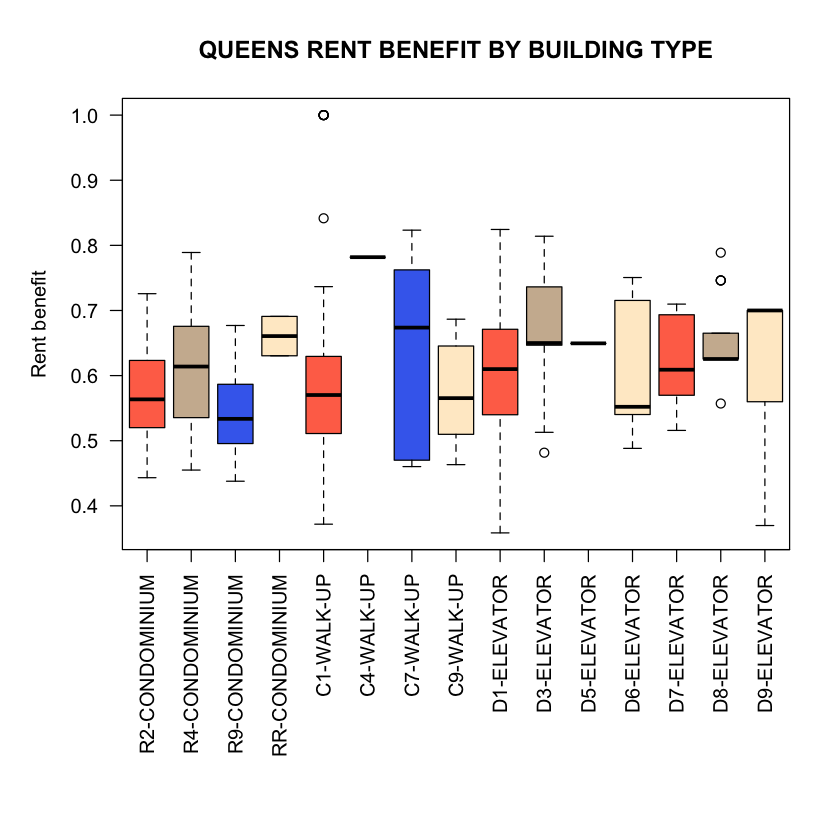

In [264]:
borough3 <- select(prices, contains("benefit"))
for_boxplot = cbind(borough3, classes, deparse.level = 1)
boxplot(benefit~building_class, data=for_boxplot, las = 2, par(mar = c(12, 5, 4, 2)+ 0.1), main=toupper("Queens rent benefit by building type"), ylab="Rent benefit", col = c("coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","blanchedalmond","royalblue2"), xlim = range(1,15))

## Bronx Data FY 2011/2012

In [265]:
borough <- read.csv(file="DOF__Condominium_Comparable_Rental_Income___Bronx___FY_2011_2012.csv",header=TRUE,sep=",");
cat('Dataset:')
head(borough)

Dataset:

,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Boro.Block.Lot,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Condo.Section,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Address,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Neighborhood,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Building.Classification,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Total.Units,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Year.Built,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Gross.SqFt,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Estimated.Gross.Income,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Gross.Income.per.SqFt,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Estimated.Expense,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Expense.per.SqFt,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Net.Operating.Income,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Full.Market.Value,BRONX.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...1.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...1.â...Address,COMPARABLE.RENTAL.â...1.â...Neighborhood,COMPARABLE.RENTAL.â...1.â...Building.Classification,COMPARABLE.RENTAL.â...1.â...Total.Units,COMPARABLE.RENTAL.â...1.â...Year.Built,COMPARABLE.RENTAL.â...1.â...Gross.SqFt,COMPARABLE.RENTAL.â...1.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...1.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...1.â...Estimated.Expense,COMPARABLE.RENTAL.â...1.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...1.â...Net.Operating.Income,COMPARABLE.RENTAL.â...1.â...Full.Market.Value,COMPARABLE.RENTAL.â...1.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...1.â...Distance.from.Condo.in.miles,COMPARABLE.RENTAL.â...2.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...2.â...Address,COMPARABLE.RENTAL.â...2.â...Neighborhood,COMPARABLE.RENTAL.â...2.â...Building.Classification,COMPARABLE.RENTAL.â...2.â...Total.Units,COMPARABLE.RENTAL.â...2.â...Year.Built,COMPARABLE.RENTAL.â...2.â...Gross.SqFt,COMPARABLE.RENTAL.â...2.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...2.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...2.â...Estimated.Expense,COMPARABLE.RENTAL.â...2.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...2.â...Net.Operating.Income,COMPARABLE.RENTAL.â...2.â...Full.Market.Value,COMPARABLE.RENTAL.â...2.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...2.â...Distance.from.Condo.in.miles,COMPARABLE.RENTAL.â...3.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...3.â...Address,COMPARABLE.RENTAL.â...3.â...Neighborhood,COMPARABLE.RENTAL.â...3.â...Building.Classification,COMPARABLE.RENTAL.â...3.â...Total.Units,COMPARABLE.RENTAL.â...3.â...Year.Built,COMPARABLE.RENTAL.â...3.â...Gross.SqFt,COMPARABLE.RENTAL.â...3.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...3.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...3.â...Estimated.Expense,COMPARABLE.RENTAL.â...3.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...3.â...Net.Operating.Income,COMPARABLE.RENTAL.â...3.â...Full.Market.Value,COMPARABLE.RENTAL.â...3.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...3.â...Distance.from.Condo.in.miles
1,2-02315-7501,0093-R1,305 EAST 140 STREET,MOTT HAVEN/PORT MORRIS,R2-CONDOMINIUM,11,1904,21092,257533,12.21,137520,6.52,120013,653000,30.96,2-02287-0133,458 EAST 143 STREET,MOTT HAVEN/PORT MORRIS,D1-ELEVATOR,37,1910,22224,263446,11.85,134152,6.04,129294,825000,37.12,0.3,2-02287-0046,489 EAST 142 STREET,MOTT HAVEN/PORT MORRIS,D3-ELEVATOR,96,1973,97926,1230694,12.57,685907,7,544787,3649000,37.26,0.3,,,,,NA,NA,,,NA,,NA,,,NA,NA
2,2-02364-7501,0099-R1,3044 3 AVENUE,MORRISANIA/LONGWOOD,R4-CONDOMINIUM,61,2006,72000,1174320,16.31,451440,6.27,722880,4504003,62.56,2-02707-0030,715 FOX STREET,MORRISANIA/LONGWOOD,D1-ELEVATOR,50,2008,60373,1192367,19.75,596184,9.88,596183,4268000,70.69,0.77,2-02688-0036,853 MACY PLACE,MORRISANIA/LONGWOOD,D1-ELEVATOR,63,2009,75119,966782,12.87,666306,8.87,300476,1175000,15.64,0.6,,,,,NA,NA,,,NA,,NA,,,NA,NA
3,2-02369-7502,0122-R1,500 EAST 165 STREET,MORRISANIA/LONGWOOD,R4-CONDOMINIUM,128,2007,150121,2005617,13.36,1122905,7.48,8827

Выгода сдачи в аренду для каждого из типов жилья в этом районе:

,building_class,mean_benefit
1,D7-ELEVATOR,0.5331217
2,R9-CONDOMINIUM,0.5283519
3,R4-CONDOMINIUM,0.5244734
4,C9-WALK-UP,0.5220734
5,D1-ELEVATOR,0.5017018
6,R2-CONDOMINIUM,0.4926502
7,C1-WALK-UP,0.4734687
8,D3-ELEVATOR,0.4648163
9,RR-CONDOMINIUM,0.4590849
10,C7-WALK-UP,0.4502368


Гистограмма выгоды сдачи жилья в этом районе по каждой сделке:

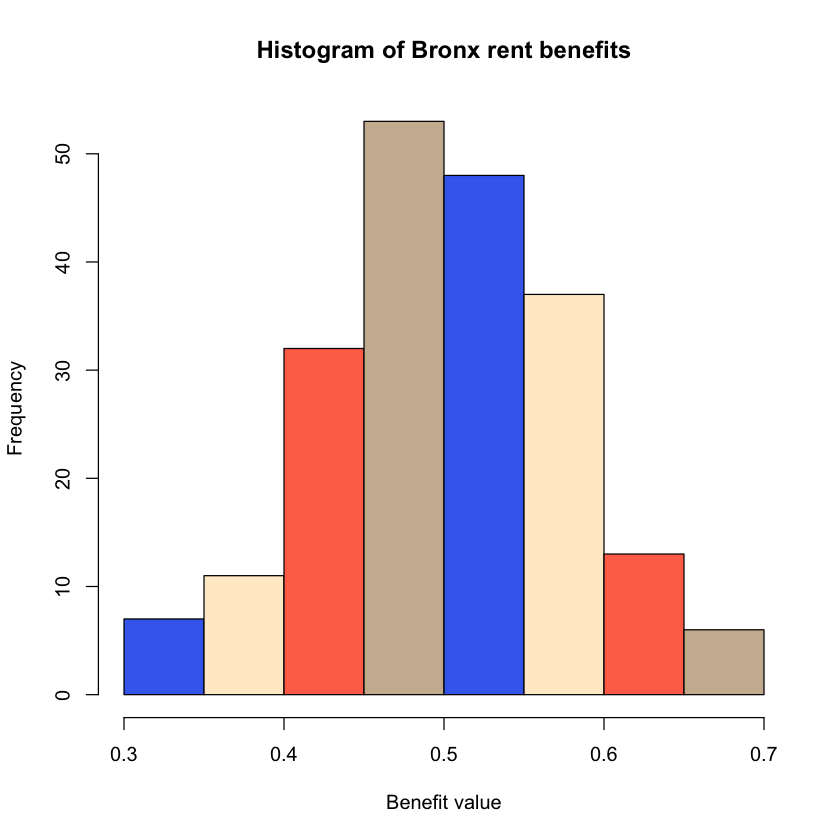

In [266]:
borough1 <- select(borough, contains("Income"))

colnames(borough1)[1] <- "col_buy_costs"
colnames(borough1)[3] <- "col_rent_costs"
colnames(borough1)[4] <- "a_col_buy_costs"
colnames(borough1)[6] <- "a_col_rent_costs"
colnames(borough1)[7] <- "b_col_buy_costs"
colnames(borough1)[9] <- "b_col_rent_costs"

borough10 <- select(borough1, col_buy_costs, col_rent_costs)
borough11 <- select(borough1, a_col_buy_costs, a_col_rent_costs)
borough12 <- select(borough1, b_col_buy_costs, b_col_rent_costs)

colnames(borough11)[1] <- "col_buy_costs"
colnames(borough11)[2] <- "col_rent_costs"
colnames(borough12)[1] <- "col_buy_costs"
colnames(borough12)[2] <- "col_rent_costs"

prices <- rbind(borough10, borough11, borough12, deparse.level = 1)
prices <- mutate(prices, benefit = col_rent_costs / col_buy_costs)

borough2 <- select(borough, contains("Classification"))

borough10 <- select(borough2, contains("PROPERTIES.â...Building.Classification"))
borough11 <- select(borough2, contains("1.â...Building.Classification"))
borough12 <- select(borough2, contains("2.â...Building.Classification"))

colnames(borough10)[1] <- "building_class"
colnames(borough11)[1] <- "building_class"
colnames(borough12)[1] <- "building_class"

classes <- rbind(borough10, borough11, borough12, deparse.level = 1)

prices_and_classes <- cbind(prices, classes)

popular_deals <- classes %>% 
    group_by(building_class) %>%
    summarise(total = n()) %>% arrange(-total)

max_benefits <- prices_and_classes %>% 
    group_by(building_class) %>%
    summarise(total = n()) %>% arrange(-total)

cat('Выгода сдачи в аренду для каждого из типов жилья в этом районе:')
mrbbt <- prices_and_classes %>% select(benefit, building_class) %>%
group_by(building_class) %>% summarise(mean_benefit = mean(benefit)) %>% arrange(-mean_benefit) %>% filter(mean_benefit > 0.1)
mrbbt

cat('Гистограмма выгоды сдачи жилья в этом районе по каждой сделке:')
hist(prices$benefit, main="Histogram of Bronx rent benefits", xlab="Benefit value", col = c("royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","blanchedalmond","royalblue2"))

In [267]:
bronx <- summarise(prices, benefit = mean(col_rent_costs, na.rm = TRUE) / mean(col_buy_costs, na.rm = TRUE))
cat('Выгода сдачи в аренду жилья в этом районе:')
bronx$benefit

cat('Сделки в этом районе по их популярности:')
popular_deals

Выгода сдачи в аренду жилья в этом районе:

[1] 0.4836535

Сделки в этом районе по их популярности:

,building_class,total
1,D1-ELEVATOR,72
2,R4-CONDOMINIUM,33
3,R2-CONDOMINIUM,27
4,D7-ELEVATOR,21
5,C1-WALK-UP,18
6,C9-WALK-UP,10
7,R9-CONDOMINIUM,7
8,C7-WALK-UP,6
9,D3-ELEVATOR,4
10,D5-ELEVATOR,4


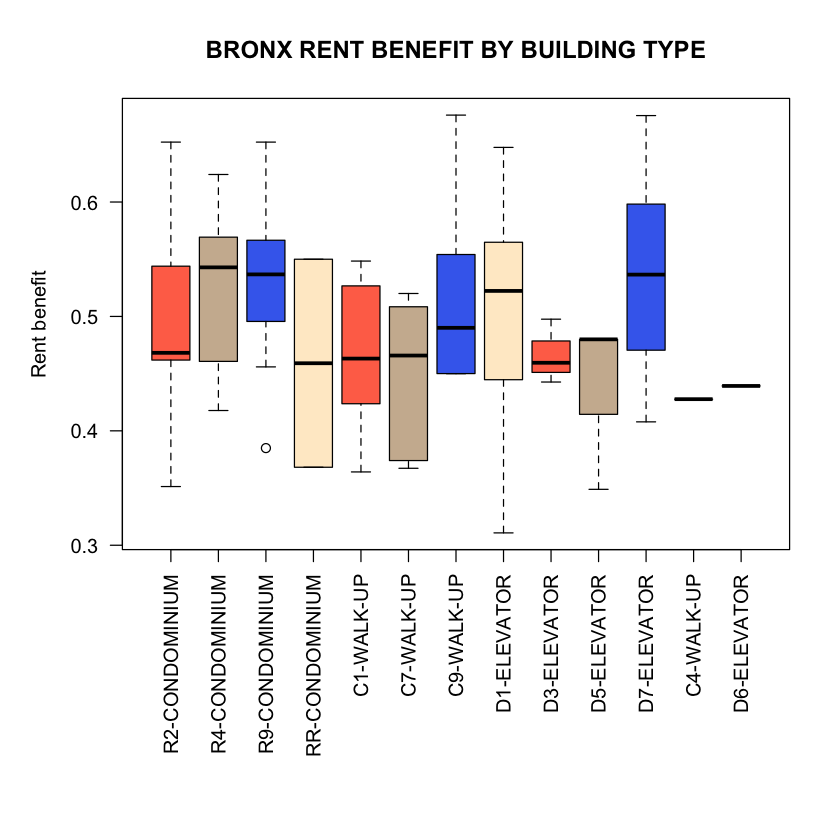

In [268]:
borough3 <- select(prices, contains("benefit"))
for_boxplot = cbind(borough3, classes, deparse.level = 1)
boxplot(benefit~building_class, data=for_boxplot, las = 2, par(mar = c(12, 5, 4, 2)+ 0.1), main=toupper("Bronx rent benefit by building type"), ylab="Rent benefit", col = c("coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","blanchedalmond","royalblue2"))

## Staten Island Data FY 2011/2012

In [269]:
borough <- read.csv(file="DOF__Condominium_Comparable_Rental_Income___Staten_Island___FY_2011_2012.csv",header=TRUE,sep=",");
cat('Dataset:')
head(borough)

Dataset:

,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Boro.Block.Lot,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Condo.Section,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Address,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Neighborhood,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Building.Classification,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Total.Units,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Year.Built,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Gross.SqFt,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Estimated.Gross.Income,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Gross.Income.per.SqFt,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Estimated.Expense,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Expense.per.SqFt,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Net.Operating.Income,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Full.Market.Value,STATEN.ISLAND.â...CONDOMINIUMS.COMPARABLE.PROPERTIES.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...1.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...1.â...Address,COMPARABLE.RENTAL.â...1.â...Neighborhood,COMPARABLE.RENTAL.â...1.â...Building.Classification,COMPARABLE.RENTAL.â...1.â...Total.Units,COMPARABLE.RENTAL.â...1.â...Year.Built,COMPARABLE.RENTAL.â...1.â...Gross.SqFt,COMPARABLE.RENTAL.â...1.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...1.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...1.â...Estimated.Expense,COMPARABLE.RENTAL.â...1.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...1.â...Net.Operating.Income,COMPARABLE.RENTAL.â...1.â...Full.Market.Value,COMPARABLE.RENTAL.â...1.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...1.â...Distance.from.Condo.in.miles,COMPARABLE.RENTAL.â...2.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...2.â...Address,COMPARABLE.RENTAL.â...2.â...Neighborhood,COMPARABLE.RENTAL.â...2.â...Building.Classification,COMPARABLE.RENTAL.â...2.â...Total.Units,COMPARABLE.RENTAL.â...2.â...Year.Built,COMPARABLE.RENTAL.â...2.â...Gross.SqFt,COMPARABLE.RENTAL.â...2.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...2.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...2.â...Estimated.Expense,COMPARABLE.RENTAL.â...2.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...2.â...Net.Operating.Income,COMPARABLE.RENTAL.â...2.â...Full.Market.Value,COMPARABLE.RENTAL.â...2.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...2.â...Distance.from.Condo.in.miles,COMPARABLE.RENTAL.â...3.â...Boro.Block.Lot,COMPARABLE.RENTAL.â...3.â...Address,COMPARABLE.RENTAL.â...3.â...Neighborhood,COMPARABLE.RENTAL.â...3.â...Building.Classification,COMPARABLE.RENTAL.â...3.â...Total.Units,COMPARABLE.RENTAL.â...3.â...Year.Built,COMPARABLE.RENTAL.â...3.â...Gross.SqFt,COMPARABLE.RENTAL.â...3.â...Estimated.Gross.Income,COMPARABLE.RENTAL.â...3.â...Gross.Income.per.SqFt,COMPARABLE.RENTAL.â...3.â...Estimated.Expense,COMPARABLE.RENTAL.â...3.â...Expense.per.SqFt,COMPARABLE.RENTAL.â...3.â...Net.Operating.Income,COMPARABLE.RENTAL.â...3.â...Full.Market.Value,COMPARABLE.RENTAL.â...3.â...Market.Value.per.SqFt,COMPARABLE.RENTAL.â...3.â...Distance.from.Condo.in.miles
1,5-00001-7501,0136-R1,80 BAY STREET,NEW BRIGHTON-ST. GEORGE,R4-CONDOMINIUM,131,1995,180775,2019257,11.17,511593,2.83,1507664,6489986,35.9,5-00008-0025,285 ST MARK'S PLACE,NEW BRIGHTON-ST. GEORGE,D1-ELEVATOR,91,1965,77000,1012863,13.15,585481,7.6,427382,2842000,36.91,0.33,5-00008-0019,299 ST MARK'S PLACE,NEW BRIGHTON-ST. GEORGE,D1-ELEVATOR,70,1951,56724,594650,10.48,326161,5.75,268489,1668000,29.41,0.33,,,,,NA,NA,,,NA,,NA,,,NA,NA
2,5-00001-7502,0147-R1,155 BAY STREET,NEW BRIGHTON-ST. GEORGE,R4-CONDOMINIUM,57,2005,62045,872353,14.06,436176,7.03,436177,2868001,46.22,5-00008-0025,285 ST MARK'S PLACE,NEW BRIGHTON-ST. GEORGE,D1-ELEVATOR,91,1965,77000,1012863,13.15,585481,7.6,427382,2842000,36.91,0.33,5-00011-0020,60 HAMILTON AVENUE,NEW BRIGHTON-ST. GEORGE,D1-ELEVATOR,109,1965,75414,1318575,17.48,696219,9.23,622356,4491000,59.55,0.45,,,,

Выгода сдачи в аренду для каждого из типов жилья в этом районе:

,building_class,mean_benefit
1,C1-WALK-UP,0.5407054
2,C7-WALK-UP,0.5207553
3,R4-CONDOMINIUM,0.5131364
4,C9-WALK-UP,0.4841102
5,D1-ELEVATOR,0.4635258
6,D3-ELEVATOR,0.41461
7,D5-ELEVATOR,0.4057177


Гистограмма выгоды сдачи жилья в этом районе по каждой сделке:

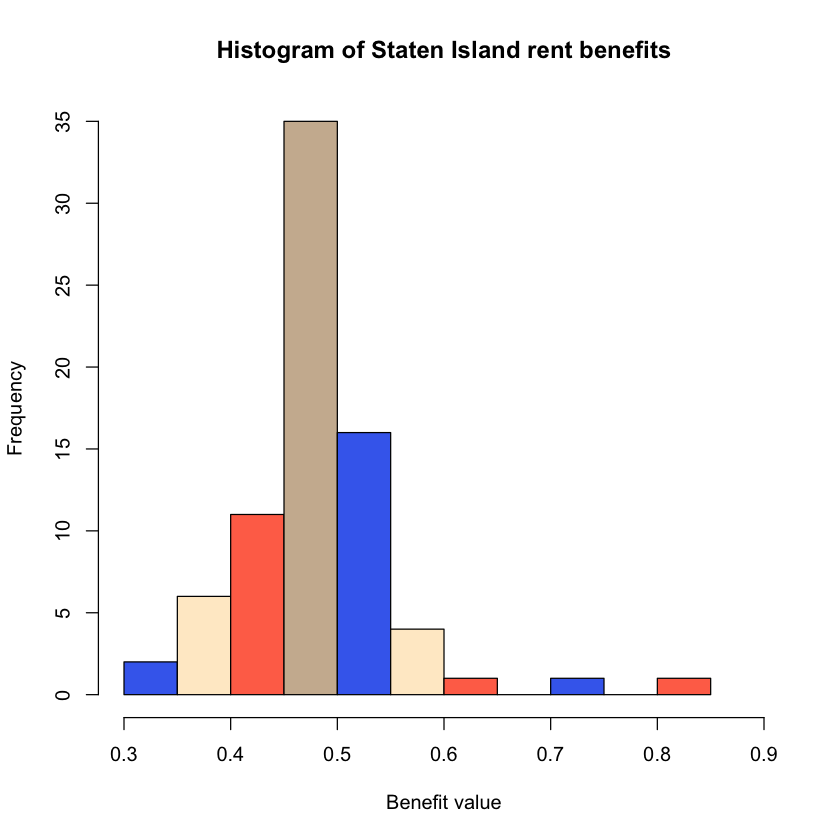

In [270]:
borough1 <- select(borough, contains("Income"))

colnames(borough1)[1] <- "col_buy_costs"
colnames(borough1)[3] <- "col_rent_costs"
colnames(borough1)[4] <- "a_col_buy_costs"
colnames(borough1)[6] <- "a_col_rent_costs"
colnames(borough1)[7] <- "b_col_buy_costs"
colnames(borough1)[9] <- "b_col_rent_costs"

borough10 <- select(borough1, col_buy_costs, col_rent_costs)
borough11 <- select(borough1, a_col_buy_costs, a_col_rent_costs)
borough12 <- select(borough1, b_col_buy_costs, b_col_rent_costs)

colnames(borough11)[1] <- "col_buy_costs"
colnames(borough11)[2] <- "col_rent_costs"
colnames(borough12)[1] <- "col_buy_costs"
colnames(borough12)[2] <- "col_rent_costs"

prices <- rbind(borough10, borough11, borough12, deparse.level = 1)
prices <- mutate(prices, benefit = col_rent_costs / col_buy_costs)

borough2 <- select(borough, contains("Classification"))

borough10 <- select(borough2, contains("PROPERTIES.â...Building.Classification"))
borough11 <- select(borough2, contains("1.â...Building.Classification"))
borough12 <- select(borough2, contains("2.â...Building.Classification"))

colnames(borough10)[1] <- "building_class"
colnames(borough11)[1] <- "building_class"
colnames(borough12)[1] <- "building_class"

classes <- rbind(borough10, borough11, borough12, deparse.level = 1)

prices_and_classes <- cbind(prices, classes)

popular_deals <- classes %>% 
    group_by(building_class) %>%
    summarise(total = n()) %>% arrange(-total)

max_benefits <- prices_and_classes %>% 
    group_by(building_class) %>%
    summarise(total = n()) %>% arrange(-total)

cat('Выгода сдачи в аренду для каждого из типов жилья в этом районе:')
mrbbt <- prices_and_classes %>% select(benefit, building_class) %>%
group_by(building_class) %>% summarise(mean_benefit = mean(benefit)) %>% arrange(-mean_benefit) %>% filter(mean_benefit > 0.1)
mrbbt

cat('Гистограмма выгоды сдачи жилья в этом районе по каждой сделке:')
hist(prices$benefit, xlim = range(0.3,0.9), main="Histogram of Staten Island rent benefits", xlab="Benefit value", col = c("royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","blanchedalmond","royalblue2"))

In [271]:
staten_island <- summarise(prices, benefit = mean(col_rent_costs, na.rm = TRUE) / mean(col_buy_costs, na.rm = TRUE))
cat('Выгода сдачи в аренду жилья в этом районе:')
staten_island$benefit

cat('Сделки в этом районе по их популярности:')
popular_deals <- popular_deals  %>% filter(building_class != popular_deals$building_class[7]) 
popular_deals

Выгода сдачи в аренду жилья в этом районе:

[1] 0.4593473

Сделки в этом районе по их популярности:

,building_class,total
1,D1-ELEVATOR,28
2,R4-CONDOMINIUM,26
3,C9-WALK-UP,10
4,D3-ELEVATOR,6
5,C1-WALK-UP,5
6,D5-ELEVATOR,1
7,C7-WALK-UP,1


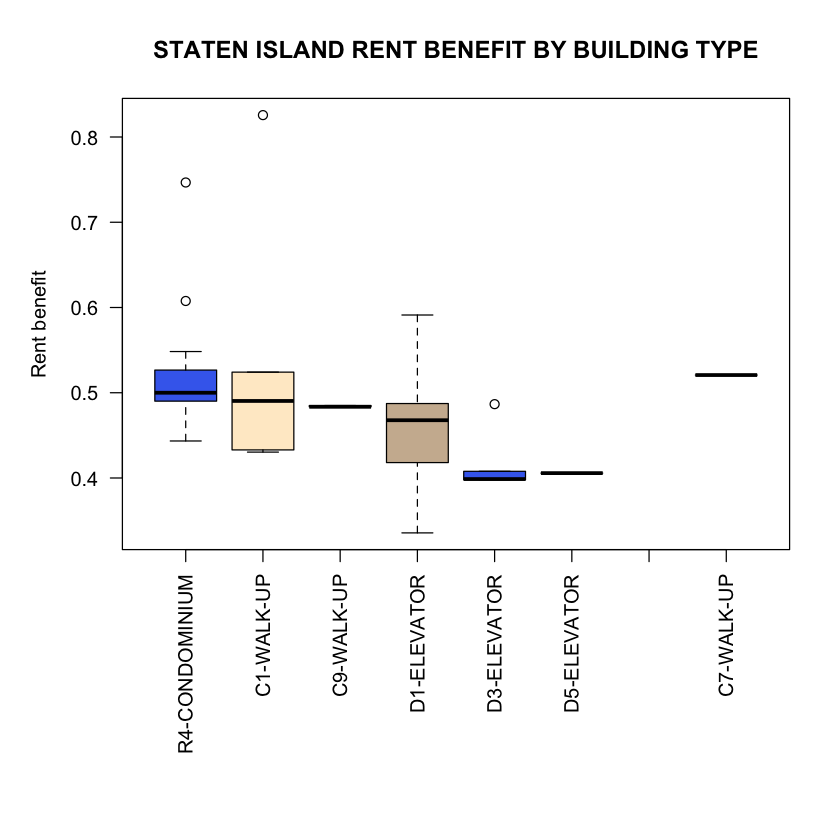

In [272]:
borough3 <- select(prices, contains("benefit"))
for_boxplot <- cbind(borough3, classes, deparse.level = 1)
for_boxplot <- for_boxplot[complete.cases(for_boxplot),]
boxplot(benefit~building_class, data=for_boxplot, las = 2, par(mar = c(12, 5, 4, 2)+ 0.1), main=toupper("Staten Island rent benefit by building type"), ylab="Rent benefit", col = c("royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","royalblue2","blanchedalmond","coral1","bisque3","blanchedalmond","royalblue2"))

In [273]:
borough <- c('Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island')
benefit <- c(manhattan$benefit, brooklyn$benefit, queens$benefit, bronx$benefit, staten_island$benefit)

In [274]:
benefits_table <- data.frame(borough, benefit)

In [275]:
cat('Выгода сдачи в аренду жилья в районах Нью-Йорка:')
benefits_table <- benefits_table %>% arrange(-benefit)
benefits_table

Выгода сдачи в аренду жилья в районах Нью-Йорка:

,borough,benefit
1,Manhattan,0.7102933
2,Queens,0.6072264
3,Brooklyn,0.545498
4,Bronx,0.4836535
5,Staten Island,0.4593473


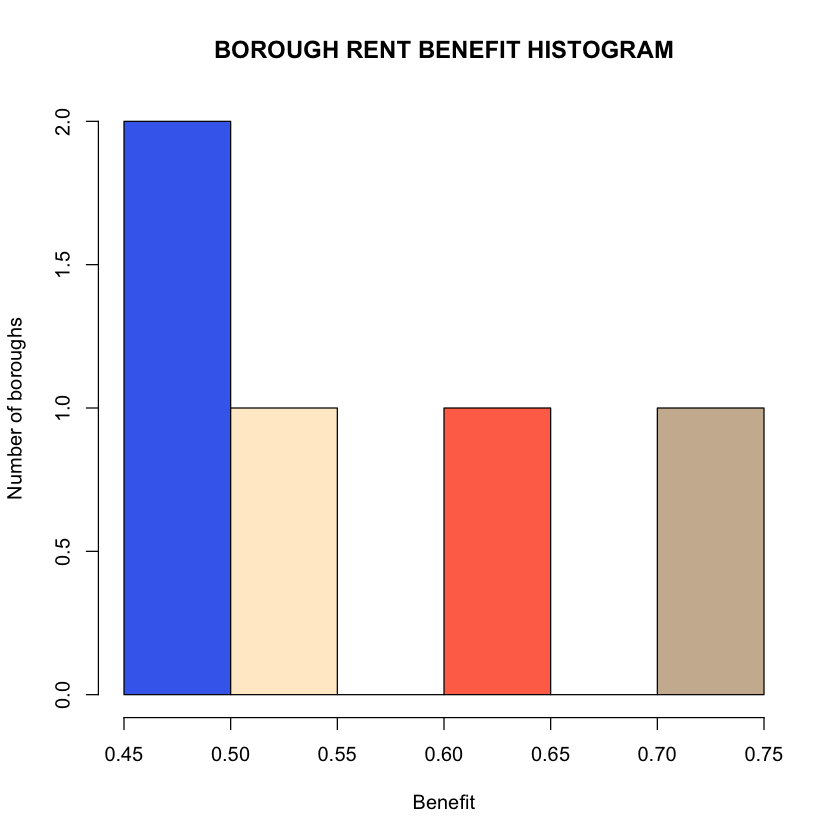

In [276]:
hist(benefits_table$benefit, xlab="Benefit", ylab="Number of boroughs", main=toupper("Borough rent benefit histogram"), col = c("royalblue2","blanchedalmond","blanchedalmond","coral1","coral1","bisque3"))

Вывод: в Нью-Йорке лучше всего жить на Манхэттене.